In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
api_keys = "32df13d8bbd8d55bfc220a0ecc23c6f8"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=32df13d8bbd8d55bfc220a0ecc23c6f8&units=metric&q=


In [4]:
lat = []
temp = []
humidity = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each
counter = 1

print("Beginning Data Retrieval")   
print("--------------------------------")  

for city in cities:
    
    response = requests.get(query_url + city).json()

    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        print(f"Processing Record {counter} | {city}") 
        counter+=1
        time.sleep(1)
    except KeyError:
        print("City not found. Skipping...")

Beginning Data Retrieval
--------------------------------
Processing Record 1 | provideniya
Processing Record 2 | dikson
Processing Record 3 | santa rosa
Processing Record 4 | hermanus
Processing Record 5 | bredasdorp
Processing Record 6 | gotsu
Processing Record 7 | biak
Processing Record 8 | mar del plata
Processing Record 9 | hervey bay
Processing Record 10 | butaritari
Processing Record 11 | palmer
Processing Record 12 | aketi
Processing Record 13 | yellowknife
Processing Record 14 | rikitea
Processing Record 15 | avera
Processing Record 16 | marathon
Processing Record 17 | albany
Processing Record 18 | saint-philippe
Processing Record 19 | ushuaia
Processing Record 20 | mataura
Processing Record 21 | hilo
City not found. Skipping...
Processing Record 22 | puri
Processing Record 23 | thompson
Processing Record 24 | chuy
Processing Record 25 | alice springs
Processing Record 26 | mamallapuram
Processing Record 27 | ponta do sol
Processing Record 28 | vaini
Processing Record 29 | nat

Processing Record 227 | erzurum
Processing Record 228 | hambantota
Processing Record 229 | rabo de peixe
Processing Record 230 | chapais
Processing Record 231 | oxford
Processing Record 232 | ostrovnoy
Processing Record 233 | xining
Processing Record 234 | port-gentil
Processing Record 235 | strezhevoy
Processing Record 236 | clyde river
Processing Record 237 | baghdad
Processing Record 238 | port moresby
Processing Record 239 | upata
City not found. Skipping...
Processing Record 240 | killybegs
Processing Record 241 | muzhi
City not found. Skipping...
Processing Record 242 | nikolskoye
Processing Record 243 | hailar
Processing Record 244 | athabasca
Processing Record 245 | prachuap khiri khan
Processing Record 246 | kharp
Processing Record 247 | sisimiut
Processing Record 248 | gumdag
Processing Record 249 | chiredzi
Processing Record 250 | qaanaaq
Processing Record 251 | lithgow
Processing Record 252 | chama
Processing Record 253 | sinnamary
Processing Record 254 | yulara
Processing 

Processing Record 455 | salisbury
Processing Record 456 | nevinnomyssk
Processing Record 457 | gizo
Processing Record 458 | seoul
Processing Record 459 | peniche
Processing Record 460 | svetlogorsk
City not found. Skipping...
Processing Record 461 | moron
Processing Record 462 | itaituba
Processing Record 463 | grootegast
Processing Record 464 | old orchard beach
City not found. Skipping...
Processing Record 465 | boyolangu
Processing Record 466 | bartica
City not found. Skipping...
Processing Record 467 | bocas del toro
Processing Record 468 | carbondale
Processing Record 469 | porto walter
Processing Record 470 | longyearbyen
Processing Record 471 | riyadh
City not found. Skipping...
Processing Record 472 | tessalit
Processing Record 473 | bonavista
Processing Record 474 | port said
Processing Record 475 | nantucket
Processing Record 476 | pimentel
City not found. Skipping...
City not found. Skipping...
Processing Record 477 | port hardy
Processing Record 478 | tondano
Processing Rec

In [5]:
print(len(lat))
print(len(cloud))
print(len(temp))
print(len(humidity))

553
553
553
553


In [6]:
df = pd.DataFrame(list(zip(cities, lat, temp, humidity, cloud, wind)), 
               columns =['City', 'Latitude', 'Temperature', 'Humidity', 'Cloud', 'Wind']) 

In [7]:
df.head()

,City,Latitude,Temperature,Humidity,Cloud,Wind
0,provideniya,64.42,9.05,94,100,6.49
1,dikson,73.51,4.95,99,100,2.98
2,santa rosa,-36.62,12.35,94,100,3.58
3,hermanus,-34.42,16.80,55,9,3.13
4,bredasdorp,-34.53,15.30,41,6,4.10


In [8]:
export_csv = df.to_csv("weather.csv"), r'C:/Desktop/Ahmad_DataBootCampHW/Homework 6/'

In [9]:
latitude = df.iloc[:,1]
city = df.iloc[:,0]
temperature = df.iloc[:,2]
humid = df.iloc[:,3]
cloudiness = df.iloc[:,4]
windiness = df.iloc[:,5]

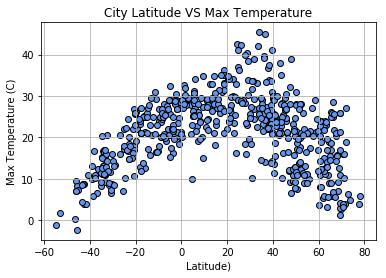

In [10]:
latitude_temp = plt.scatter(latitude, temperature, color="cornflowerblue", 
                        marker="o", edgecolor="black")

plt.title("City Latitude VS Max Temperature")
plt.xlabel("Latitude)")
plt.ylabel("Max Temperature (C)")

plt.grid(b=True)

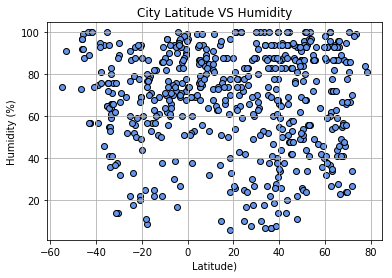

In [11]:
latitude_humidity = plt.scatter(latitude, humidity, color="cornflowerblue", 
                        marker="o", edgecolor="black")

plt.title("City Latitude VS Humidity")
plt.xlabel("Latitude)")
plt.ylabel("Humidity (%)")

plt.grid(b=True)

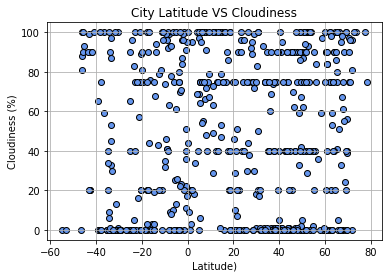

In [12]:
latitude_cloudiness = plt.scatter(latitude, cloudiness, color="cornflowerblue", 
                        marker="o", edgecolor="black")

plt.title("City Latitude VS Cloudiness")
plt.xlabel("Latitude)")
plt.ylabel("Cloudiness (%)")

plt.grid(b=True)

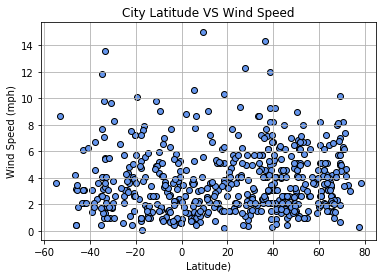

In [13]:
latitude_wind = plt.scatter(latitude, windiness, color="cornflowerblue", 
                        marker="o", edgecolor="black")

plt.title("City Latitude VS Wind Speed")
plt.xlabel("Latitude)")
plt.ylabel("Wind Speed (mph)")

plt.grid(b=True)

In [14]:
plt.savefig("City Latitude VS Cloudiness.png")
plt.savefig("City Latitude VS Wind Speed.png")
plt.savefig("City Latitude VS Humidity.png")

<Figure size 432x288 with 0 Axes>